In [15]:
import glob
import numpy as np
from astropy.io import fits
import pandas as pd

In [16]:
def massAAPreader(ID, campaign):
    
    try:

        #lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc');
        lcfile=glob.glob('../../GO*/ktwo'+str(ID)+'-c'+campaign+'_lpd-targ.fits_massAAP_lc_TH8_k2sc.lc')[0]

       # if len(lcfile)==0:
       #     massAAP_k2sc_corr_flux = massAAP(each,True)
       #     lcfile=glob.glob('../../GO*/*'+target.split('/')[-1].split('_')[0][4:]+'*k2sc.lc')

        #print(lcfile)
        lc=np.genfromtxt(lcfile,delimiter=' ',skip_header=1)
        massAAPreader.lc=lc
        bjd=lc[:,0]
        flux=lc[:,1]

        
        return bjd, flux
    
    except IndexError:
        
        return False, False

In [17]:
def k2sffreader(ID, campaign):
    
    try:

        k2sfffile = 'K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_'+str(ID)+'-c'+campaign+'_kepler_v1_llc.fits'
        print(k2sfffile)
        
      #  if 'c102' in target:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:19]+'kepler_v1_llc.fits'
      #  else:
      #      k2sfffile ='hlsp_k2sff_k2_lightcurve_'+target.split('/')[-1][4:18]+'kepler_v1_llc.fits'

  #      hdul = fits.open('K2SFF_LCs_from_MAST_via_file_upload_form/'+k2sfffile)
         
  #      data=hdul[1].data
    
        data = fits.getdata(k2sfffile, ext=1)
        
#        k2sff_time=hdul[1].data['T']
#        k2sff_fcor=hdul[1].data['FCOR']
#        k2sff_fraw=hdul[1].data['FRAW']

        k2sff_time=data['T']
        k2sff_fcor=data['FCOR']
        k2sff_fraw=data['FRAW']

        
        del data
       # hdul.close()
    


        return k2sff_time, k2sff_fcor, k2sff_fraw
    
    except FileNotFoundError:
        
        return False, False, False

In [18]:
def K2SCzett_SAPandPDCMAPreader(ID, campaign):
    
    try:

        k2scfile = 'hlsp_k2sc_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2_lc.fits'

      #  if 'c102' in target:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2_lc.fits'
      #  else:
      #      k2scfile='hlsp_k2sc_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2_lc.fits'

        #hdul=fits.open(k2scfile)

        
        
        #data=hdul[1].data
        
        data_ext1 = fits.getdata(k2scfile, ext=1)
        data_ext2 = fits.getdata(k2scfile, ext=2)
        
        k2sc_saptime=data_ext1['TIME'][[data_ext1['quality']][0]==0]    
        k2sc_sapflux=(data_ext1['flux']+data_ext1['trtime']-np.nanmedian(data_ext1['trtime']))[data_ext1['quality'] == 0]

        k2sc_pdcmaptime=data_ext2['TIME'][data_ext2['quality']==0]
        k2sc_pdcmapflux=(data_ext2['flux']+data_ext2['trtime']-np.nanmedian(data_ext2['trtime']))[data_ext2['quality'] == 0]

        #hdul.close()
        

        return k2sc_saptime, k2sc_sapflux, k2sc_pdcmaptime, k2sc_pdcmapflux
    
    except FileNotFoundError:
        
        return False, False, False, False

In [19]:
def SAPandPDCMAPreader(ID, campaign):
    
    try:
    
        sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+str(ID)+'-c'+campaign+'_llc.fits'

      #  if 'c102' in target:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:19]+'llc.fits'
      #  else:
      #      sap_pdcmap_file='SAPandPDCMAPfromMAST/ktwo'+target.split('/')[-1][4:18]+'llc.fits'

   #     hdul=fits.open(sap_pdcmap_file)
   #     data=hdul[1].data

        data=fits.getdata(sap_pdcmap_file, ext=1)
        
        sapflux=data['SAP_FLUX'][data['SAP_QUALITY']==0]
        saptime=data['TIME'][data['SAP_QUALITY']==0]

        pdcsapflux=data['PDCSAP_FLUX'][data['SAP_QUALITY']==0]
        pdcsaptime=data['TIME'][data['SAP_QUALITY']==0]

        del data
        

    #    hdul.close()
        return sapflux, saptime, pdcsapflux, pdcsaptime
    
    except FileNotFoundError:
        return False, False, False, False

In [20]:
def K2P2reader(ID, campaign):
    
    try:

        #K2P2file=glob.glob('K2P2_attila_scriptjevel/'+target.split('/')[-1].split('_')[0]+'*')[0]

        K2P2file='K2P2_attila_scriptjevel/ktwo'+str(ID)+'-c'+campaign+'_llc.dat'

        df=pd.read_csv(K2P2file,skiprows=14,header=None,sep=r"\s*",engine='python')
        k2p2bjd=df[0][df[5]==0]
        k2p2flux=df[3][df[5]==0]

        del df
        
        return k2p2bjd, k2p2flux
    
    except FileNotFoundError:
        
        return False, False

In [60]:
def everestreader(ID, campaign):
    
    try:

        everestfile='/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_'+str(ID)+'-c'+campaign+'_kepler_v2.0_lc.fits'

        print(everestfile)
        print('\n')
        
      #  if 'c102' in target:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:19]+'kepler_v2.0_lc.fits'
      #  else:
      #      everestfile='hlsp_everest_k2_llc_'+target.split('/')[-1][4:18]+'kepler_v2.0_lc.fits'


        #hdul = fits.open('EVEREST_LCs_from_MAST_via_file_upload_form/'+everestfile)
        
        data=fits.getdata(everestfile, ext=1)

        time=data['TIME']
        fcor=data['FCOR']
        everest_fraw = data['FRAW']
        quality=np.where(data['QUALITY']==0)    
        
        
        
        #time=hdul[1].data['TIME']
        #fcor=hdul[1].data['FCOR']
        #everest_fraw = hdul[1].data['FRAW']
        #quality=np.where(hdul[1].data['QUALITY']==0)    
        #hdul.close()

        everest_time=time[quality]
        everest_fcor=fcor[quality]

        everest_fraw_time=time

        del data
        
        

        return everest_time, everest_fcor, everest_fraw_time, everest_fraw
    
    except FileNotFoundError:
        
        return False, False, False, False

In [145]:
df=pd.read_csv('kp_mag_search.csv')

class star:
    def __init__(self, ID, campaign):
        
        self.ID=ID
        self.campaign=campaign
        
        self.keplermag = float((df[df['EPIC']==str(self.ID)]['KepMag']).values[0])
        
        self.massaapbjd, self.massaapflux = massAAPreader(self.ID, self.campaign)
        
        self.k2sff_time, self.k2sff_fcor, self.k2sff_fraw = k2sffreader(self.ID, self.campaign)
        self.k2sc_saptime, self.k2sc_sapflux, self.k2sc_pdcsaptime, self.k2sc_pdcsapflux = K2SCzett_SAPandPDCMAPreader(self.ID, self.campaign)
        self.sapflux, self.saptime, self.pdcsapflux, self.pdcsaptime = SAPandPDCMAPreader(self.ID, self.campaign)
        self.k2p2bjd, self.k2p2flux = K2P2reader(ID, campaign)
        self.everest_time, self.everest_fcor, self.everest_fraw_time, self.everest_fraw = everestreader(self.ID, self.campaign)
        

In [146]:
GO6082targets=glob.glob('../../GO6082/*c06*lpd*targ.fits')
GO8037targets=glob.glob('../../GO8037/*c08*lpd*targ.fits')
GO10037_1_targets=glob.glob('../../GO10037/*c101*lpd*targ.fits')
GO10037_2_targets=glob.glob('../../GO10037/*c102*lpd*targ.fits')
GO12111targets=glob.glob('../../GO12111/*c12*lpd*targ.fits')
GO13111targets=glob.glob('../../GO13111/*c13*lpd*targ.fits')
GO14058targets=glob.glob('../../GO14058/*c14*lpd*targ.fits')
GO15058targets=glob.glob('../../GO15058/*c15*lpd*targ.fits')
GO16058targets=glob.glob('../../GO16058/*c16*lpd*targ.fits')
GO17033targets=glob.glob('../../GO17033/*c17*lpd*targ.fits')
GO18033targets=glob.glob('../../GO18033/*c18*lpd*targ.fits')

In [147]:
targetlist=(
GO6082targets+
GO8037targets+
GO10037_1_targets+
GO10037_2_targets+
GO12111targets+
GO13111targets+
GO14058targets+
GO15058targets+
GO16058targets+
GO17033targets+
GO18033targets)

In [148]:
def maxfreq_maxpower(time, flux):
    
    frequency, power = LombScargle(time, flux).autopower()
    #plt.plot(frequency, power)       
    nyquist = len(time)/(2*(max(time)-min(time)))
    #plt.xlim([0,nyquist])
    best_frequency = frequency[np.argmax(power[frequency<nyquist])]
    #print(best_frequency)
    maxpower=np.max(power[frequency<nyquist])
    #print(maxpower)
    
    return best_frequency, maxpower

In [149]:
targetlist[0]

'../../GO6082/ktwo212330039-c06_lpd-targ.fits'

In [152]:
targetdict={}

sap_maxpower_list=[]
pdcsap_maxpower_list=[]
k2sc_sap_maxpower_list=[]
k2sc_pdcsap_maxpower_list=[]
k2sff_maxpower_list=[]
k2p2_maxpower_list=[]
everest_maxpower_list=[]
massaap_maxpower_list=[]

kpmaglist=[]

for index, each in enumerate(targetlist):
    
    if index<50:
    #if True:
    
        print(index/len(targetlist))
        print(index)
        print(each)
        
        ID=each.split('/')[-1].split('-')[0][4:]
        campaign=each.split('/')[-1].split('-')[1].split('_')[0][1:]

        ourstar=star(ID,campaign)
        
        kpmaglist.append(ourstar.keplermag)
        
        if ourstar.sapflux is not False:
            sap_fund_freq, sap_maxpower = maxfreq_maxpower(ourstar.saptime, ourstar.sapflux)
            sap_maxpower_list.append(sap_maxpower)
        else:
            sap_maxpower_list.append('NODATA')
            
        if ourstar.pdcsapflux is not False:
            pdcsap_fund_freq, pdcsap_maxpower = maxfreq_maxpower(ourstar.pdcsaptime, ourstar.pdcsapflux)
            pdcsap_maxpower_list.append(pdcsap_maxpower)
        else:
            pdcsap_maxpower_list.append('NODATA')
            
        if ourstar.k2sff_fcor is not False:
            k2sff_fund_freq, k2sff_maxpower = maxfreq_maxpower(ourstar.k2sff_time, ourstar.k2sff_fcor)
            k2sff_maxpower_list.append(k2sff_maxpower)
        else:
            k2sff_maxpower_list.append('NODATA')
            
        if ourstar.k2sc_sapflux is not False:
            k2sc_sap_fund_freq, k2sc_sap_maxpower = maxfreq_maxpower(ourstar.k2sc_saptime, ourstar.k2sc_sapflux)
            k2sc_sap_maxpower_list.append(k2sc_sap_maxpower)
        else:
            k2sc_sap_maxpower_list.append(k2sc_sap_maxpower)
            
        if ourstar.k2sc_pdcsapflux is not False:
            k2sc_pdcsap_fund_freq, k2sc_pdcsap_maxpower = maxfreq_maxpower(ourstar.k2sc_pdcsaptime, ourstar.pdcsapflux)
            k2sc_pdcsap_maxpower_list.append(k2sc_pdcsap_maxpower)
        else:
            k2sc_pdcsap_maxpower_list.append('NODATA')
            
        if ourstar.k2p2flux is not False:
            k2p2_fund_freq, k2p2_maxpower = maxfreq_maxpower(ourstar.k2p2bjd, ourstar.k2p2flux)
            k2p2_maxpower_list.append(k2p2_maxpower)
        else:
            k2p2_maxpower_list.append('NODATA')
            
        if ourstar.everest_fcor is not False:
            everest_fund_freq, everest_maxpower = maxfreq_maxpower(ourstar.everest_time, ourstar.everest_fcor)
            everest_maxpower_list.append(everest_maxpower)
        else:
            everest_maxpower_list.append('NODATA')
        
        if ourstar.massaapflux is not False:
            massaap_fund_freq, massaap_maxpower = maxfreq_maxpower(ourstar.massaapbjd, ourstar.massaapflux)
            massaap_maxpower_list.append(massaap_maxpower)
        else:
            massaap_maxpower_list.append('NODATA')

0.0
0
../../GO6082/ktwo212330039-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212330039-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212330039-c06_kepler_v2.0_lc.fits




/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2379: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/pandas/io/parsers.py:2381: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/fast_impl.py:80: RuntimeWarning: invalid value encountered in subtract
  y = y - np.dot(w, y)
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:140: RuntimeWarning: invalid value encountered in multiply
  h = h * np.exp(2j * np.pi * f0 * (t - t0))
/home/szabopal/.local/lib/python3.6/site-packages/astropy/stats/lombscargle/implementations/utils.py:71: RuntimeWarning: invalid value encountered in multiply
  numerator = y * np.prod(x - ilo - np.arange(M)[:, np.newaxis], 0)


0.00046511627906976747
1
../../GO6082/ktwo229228114-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228114-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228114-c06_kepler_v2.0_lc.fits


0.0009302325581395349
2
../../GO6082/ktwo212571112-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212571112-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212571112-c06_kepler_v2.0_lc.fits


0.0013953488372093023
3
../../GO6082/ktwo229228086-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_229228086-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_229228086-c06_kepler_v2.0_lc.fits


0.0018604651162790699
4
../../GO6082/ktwo212753920-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212417452-c06_kepler_v2.0_lc.fits


0.013488372093023256
29
../../GO6082/ktwo212347262-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212347262-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212347262-c06_kepler_v2.0_lc.fits


0.013953488372093023
30
../../GO6082/ktwo212585135-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212585135-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc_212585135-c06_kepler_v2.0_lc.fits


0.01441860465116279
31
../../GO6082/ktwo212598683-c06_lpd-targ.fits
K2SFF_LCs_from_MAST_via_file_upload_form_2/hlsp_k2sff_k2_lightcurve_212598683-c06_kepler_v1_llc.fits
/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo/EVEREST_thirdtrial/hlsp_everest_k2_llc

In [153]:
sap_massaap_maxpower_ratio=[]
for index, each in enumerate(sap_maxpower_list):
    try:
        sap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        sap_massaap_maxpower_ratio.append('NODATA')
        
pdcsap_massaap_maxpower_ratio=[]
for index, each in enumerate(pdcsap_maxpower_list):
    try:
        pdcsap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        pdcsap_massaap_maxpower_ratio.append('NODATA')

k2sc_sap_massaap_maxpower_ratio=[]
for index, each in enumerate(k2sc_sap_maxpower_list):
    try:
        k2sc_sap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2sc_sap_massaap_maxpower_ratio.append('NODATA')

k2sc_pdcsap_massaap_maxpower_ratio=[]
for index, each in enumerate(k2sc_pdcsap_maxpower_list):
    try:
        k2sc_pdcsap_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2sc_pdcsap_massaap_maxpower_ratio.append('NODATA')


k2sff_massaap_maxpower_ratio=[]
for index, each in enumerate(k2sff_maxpower_list):
    try:
        k2sff_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2sff_massaap_maxpower_ratio.append('NODATA')
        
k2p2_massaap_maxpower_ratio=[]
for index, each in enumerate(k2p2_maxpower_list):
    try:
        k2p2_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        k2p2_massaap_maxpower_ratio.append('NODATA')
        
everest_massaap_maxpower_ratio=[]
for index, each in enumerate(everest_maxpower_list):
    try:
        everest_massaap_maxpower_ratio.append(each/massaap_maxpower_list[index])
    except TypeError:
        everest_massaap_maxpower_ratio.append('NODATA')
        

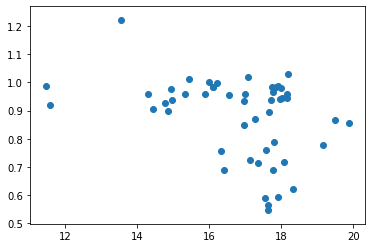

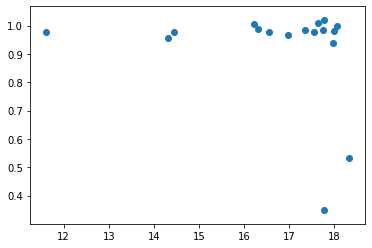

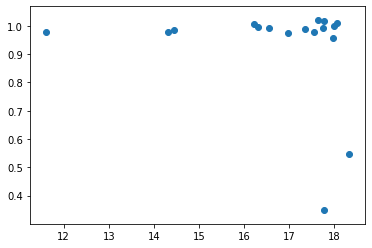

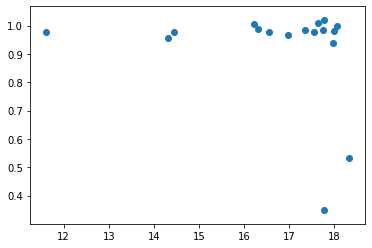

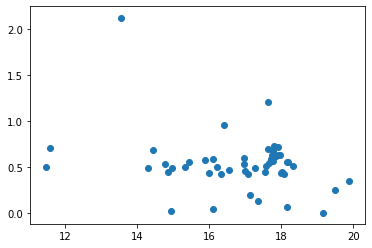

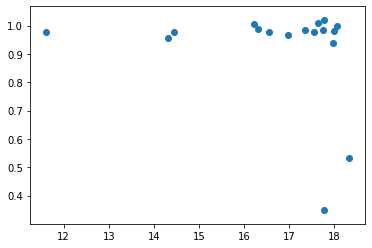

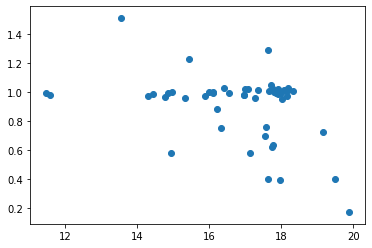

In [171]:
plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(sap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(sap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(pdcsap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(pdcsap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2sc_sap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2sc_sap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2sc_pdcsap_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2sc_pdcsap_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2sff_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2sff_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(k2p2_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(k2p2_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])

plt.figure()
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (np.dtype(everest_massaap_maxpower_ratio[index])=='float64')],
            
            [each for index, each in enumerate(everest_massaap_maxpower_ratio) if
             np.dtype(each)=='float64'])


In [159]:
[each for index, each in enumerate(kpmaglist) if 
             (type(sap_massaap_maxpower_ratio[index])==float)]

[]

In [164]:
for index, each in enumerate(kpmaglist):
    print(np.dtype(sap_massaap_maxpower_ratio[index])=='float64')

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [157]:
sap_massaap_maxpower_ratio

[0.9881242886403079,
 0.6224503820248364,
 0.8685660133513925,
 0.715101301107609,
 0.946336538970557,
 0.7569709560799305,
 0.8997951063241052,
 0.7784545172596264,
 0.5928689015357658,
 0.9995323831703887,
 0.9831942488559552,
 0.9825669509304543,
 0.7176152900974979,
 0.9193593818088429,
 0.8966320687778814,
 0.7605815178114361,
 0.9048086886421655,
 1.0005084062821057,
 0.9266186655203432,
 0.980234244900104,
 0.9578334026032246,
 0.9600703453659789,
 0.9585390609044113,
 0.9382627206144625,
 0.986951887400946,
 0.9392989201953507,
 0.6888834435435741,
 0.9436419866660357,
 0.9327017578231408,
 0.5470777070219451,
 0.9661651799181482,
 0.9845103764274648,
 1.2212382269144753,
 1.0186880167471941,
 0.9575380912467651,
 0.8555128649344566,
 0.5897029425842454,
 0.9569452975238981,
 1.0295485363478787,
 0.9775700049057872,
 0.8650527823718264,
 0.7235007542433972,
 0.5644856067671747,
 0.6906708244050566,
 0.7877480521427864,
 0.9826718650427726,
 1.0104707413647671,
 0.95984170116851

ValueError: x and y must be the same size

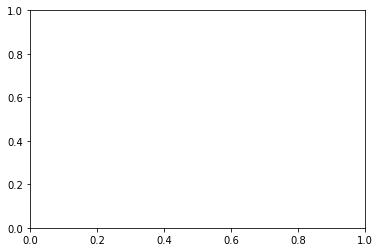

In [151]:
plt.figure()
plt.scatter(kpmaglist,sap_massaap_maxpower_ratio)
plt.scatter([each for index, each in enumerate(kpmaglist) if 
             (type(sap_massaap_maxpower_ratio[index])==int)],
            
            [each for index, each in enumerate(sap_massaap_maxpower_ratio) if
             (type(kpmaglist[index])==int)])


plt.figure()
plt.scatter(kpmaglist,pdcsap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sc_sap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sc_pdcsap_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2sff_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,k2p2_massaap_maxpower_ratio)
plt.figure()
plt.scatter(kpmaglist,everest_massaap_maxpower_ratio)

In [88]:
ourstar.k2sff_time

array([2384.83104431, 2384.85147667, 2384.87190894, ..., 2463.30967793,
       2463.33010978, 2463.35054164])

In [26]:
ourstar.saptime

array([2384.48369574, 2384.50412811, 2384.52456029, ..., 2463.30967793,
       2463.33010978, 2463.35054164])

In [27]:
ourstar.sapflux

array([423824.9 , 448112.16, 448150.7 , ..., 416707.34, 400536.25,
       387125.38], dtype=float32)

In [28]:
from astropy.stats import LombScargle

In [29]:
!pwd

/home/szabopal/PycharmProjects/eap/united/massAAP_atnezo


In [30]:
import sys
terminalpythonpath=['', '/home/szabopal/PycharmProjects/venv36/lib/python36.zip', '/home/szabopal/PycharmProjects/venv36/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '/home/szabopal/PycharmProjects/venv36/lib/python3.6/site-packages']
[sys.path.append(each) for each in terminalpythonpath]
import matplotlib.pyplot as plt

In [54]:
frequency, power = LombScargle(ourstar.saptime, ourstar.sapflux).autopower()
#plt.plot(frequency, power)       
nyquist = len(ourstar.saptime)/(2*(max(ourstar.saptime)-min(ourstar.saptime)))
#plt.xlim([0,nyquist])
best_frequency = frequency[np.argmax(power[frequency<nyquist])]
print(best_frequency)
maxpower=np.max(power[frequency<nyquist])
print(maxpower)

1.6267925835097712
0.7038520826726467
